##### Install and import

In [ ]:
# pip install matplotlib pandas numpy seaborn scikit-learn CatBoost tqdm streamlit openpyxl

In [6]:
# pip install --upgrade jupyter ipywidgets

In [ ]:
import os
from tqdm import tqdm
from collections import Counter

# data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, root_mean_squared_error
from catboost import CatBoostClassifier

# streamlit
import streamlit as st

import warnings
warnings.filterwarnings("ignore") 

##### Datasets

In [ ]:
project_path = os.getcwd()
columns_regular = ['folder', 'diagnosis', 'gases_ph', 'gases_co2', 'glucosa', 'lactat', 'be']
columns_hypoxia = ['folder', 'diagnosis', 'gases_ph', 'gases_co2', 'glucosa', 'lactat', 'be', 'empty']

In [232]:
regular = pd.read_excel(os.path.join(project_path, 'data', 'regular.xlsx'), names = columns_regular)
regular = regular.drop([0, 1], axis = 0).reset_index(drop = True)
regular = regular.replace('–', np.nan)
regular

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be
0,155156,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN
4,128129,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7
...,...,...,...,...,...,...,...
60,123,II своевременные роды\nПлоский плодный пузырь\...,NaN,NaN,NaN,NaN,NaN
61,120,I своевременные роды в 30 лет\nМноговодие\nРан...,NaN,NaN,NaN,NaN,NaN
62,117118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5
63,108109,I своевременные оперативные роды в 37 лет\nСла...,NaN,NaN,NaN,NaN,NaN


In [233]:
hypoxia = pd.read_excel(os.path.join(project_path, 'data', 'hypoxia.xlsx'), names = columns_hypoxia)
hypoxia = hypoxia.drop(0, axis = 0).reset_index(drop = True)
hypoxia = hypoxia.drop('empty', axis = 1)
hypoxia = hypoxia.replace('–', np.nan)
hypoxia = hypoxia.replace('-', np.nan)
hypoxia

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,"7,1",6.7,"-14,0"


In [234]:
import re

for column in tqdm(hypoxia.columns[2:]):
    for row in range(len(hypoxia)):
        if type(hypoxia.loc[row, column]) == str:
            hypoxia.loc[row, column] = float(re.sub(r',', '.', hypoxia.loc[row, column]))
hypoxia

100%|██████████| 5/5 [00:00<00:00, 677.40it/s]


,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,7.1,6.7,-14.0


In [235]:
print('Hypoxia: ')
print(hypoxia.info())
print()
print('Regular: ')
print(regular.info())

Hypoxia: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   folder     28 non-null     object
 1   diagnosis  28 non-null     object
 2   gases_ph   20 non-null     object
 3   gases_co2  8 non-null      object
 4   glucosa    18 non-null     object
 5   lactat     19 non-null     object
 6   be         20 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB
None

Regular: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   folder     64 non-null     object 
 1   diagnosis  63 non-null     object 
 2   gases_ph   18 non-null     float64
 3   gases_co2  18 non-null     float64
 4   glucosa    18 non-null     float64
 5   lactat     18 non-null     float64
 6   be         18 non-null     float64
dtypes: float64(5),

In [216]:
print('Regular: ')
regular.describe()

Regular: 


,gases_ph,gases_co2,glucosa,lactat,be
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,7.346111,38.338889,4.761111,2.416667,-4.533333
std,0.066061,10.025505,0.813951,0.819792,2.393127
min,7.200000,17.300000,3.700000,1.600000,-9.200000
25%,7.308000,33.650000,4.125000,1.725000,-6.075000
50%,7.352500,39.300000,4.800000,2.100000,-3.350000
75%,7.369750,44.175000,5.375000,2.925000,-2.800000
max,7.500000,54.800000,6.600000,4.100000,-1.400000


In [135]:
print('Hypoxia: ')
hypoxia.describe()

Hypoxia: 


,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be
count,28,28,20.0,8.0,18.0,19.0,20.0
unique,27,24,17.0,7.0,12.0,16.0,18.0
top,14,I своевременные оперативные роды\nОстрая гипок...,7.3,42.5,5.1,6.7,-11.6
freq,2,2,2.0,2.0,4.0,2.0,2.0


##### Blood Analysis

In [218]:
for column in regular.columns[2:]:
    print('Comparison for: ', column)
    print('Hypoxia: ')
    print(hypoxia[column].min(), hypoxia[column].max())
    print('Regular: ')
    print(regular[column].min(), regular[column].max())
    print()

Comparison for:  gases_ph
Hypoxia: 
6.96 7.421
Regular: 
7.2 7.5

Comparison for:  gases_co2
Hypoxia: 
14.7 75.8
Regular: 
17.3 54.8

Comparison for:  glucosa
Hypoxia: 
3.9 7.1
Regular: 
3.7 6.6

Comparison for:  lactat
Hypoxia: 
1.2 19.0
Regular: 
1.6 4.1

Comparison for:  be
Hypoxia: 
-24.3 -0.5
Regular: 
-9.2 -1.4



#### Материалы, использованные для работы:

https://diseases2.medelement.com/material/%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D1%80%D0%B5%D1%82%D0%B0%D1%86%D0%B8%D1%8F-%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D1%85-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D1%81%D0%BF%D1%80%D0%B0%D0%B2%D0%BE%D1%87%D0%BD%D0%BE%D0%B5-%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5/13351381461072?ysclid=mg6d1794xi699930855


рН (potentio hydrohenii)
- показатели реакции крови, десятичный логарифм концентрации Н-ионов с обратным знаком. рН обратно пропорционален концентрации водородных ионов.

Норма: 7,35 – 7,45 (концентрация Н+=44 – 36 нмоль/л)

рН выше нормы – алкалемия. Причины: алкалоз метаболический или дыхательный, некомпенсированный или субкомпенсированный (при полностью компенсированном алкалозе рН находится в пределах нормы).

рН ниже нормы – ацидемия. Причины: ацидоз метаболический или дыхательный, некомпенсированный или субкомпенсированный (при полностью компенсированном ацидозе рН находится в пределах нормы).



рСО2 – парциальное давление углекислого газа

Норма: 35-45 мм.рт.ст. (4,5-6,0 кПа)

рСО2 выше нормы – гиперкапния (гиперкарбия):
1. Первичный сдвиг – дыхательный ацидоз; если при этом рН ниже нормы – ацидоз не- или субкомпенсированный, если рН в пределах нормы - ацидоз компенсированный.
2. Вторичный сдвиг – дыхательная компенсация при метаболическом алкалозе (начинается сразу, но достигает максимума через 12-24 часа).

рСО2 ниже нормы – гипокапния (гипокарбия).
1. Первичный сдвиг – дыхательный алкалоз; если при этом рН выше нормы – алкалоз не- или субкомпенсированный, если рН в пределах нормы – алкалоз компенсированный.
2. Вторичный сдвиг – дыхательная компенсация при метаболическом ацидозе (начинается сразу, но достигает максимума через 12-24 часа)


Интерпретация результатов пробы толерантности к глюкозе
(исследование капиллярной крови по методу Хагедорна-Йенсена)

 	Содержание глюкозы в крови, моль, л	Глюкозурия
 	    натощак	через 1 ч	через 2 ч	 Нет

Норма 	  
          < 6,7 	 < 10	  < 6,7	     Нет

Сомнительные результаты	 
          < 6,7 	  < 10     6,7-8,3   Нет 
         6,7-7,2      10-11     < 6,7

Латентный диабет
           < 6,7  	  <11	   > 8,3 	 Нет

Уверенный диагноз латентного диабета
           < 6,7 	  > 11 	   > 8,3	 Часто отсутствует

Явный диабет 	
           > 7,2 	 > 11	   > 8,3	 Почти всегда есть


Молочная кислота – МК (лактат)
Она является конечным продуктом гликолиза и гликогенолиза, образуется в организме в результате восстановления пировиноградной кислоты в анаэробных условиях; ее накопление вызывает метаболический ацидоз (лактат-ацидоз).

Повышение в крови:
- гипоксии: дыхательная недостаточность сердечная недостаточность, шок, анемии и др.
- токсикозы

- интенсивная мышечная работа
- судорожные состояния: эпилепсия, тетания, столбняк и др.
- злокачественные новообразования
- острый гепатит (особенно в терминальных состояниях цирроза печени)


ВЕ (base excess) избыток оснований – сдвиг буферных оснований
Различие между фактической величиной ВВ и их нормальным значением (ВЕ = ВВ – НВВ)
Норма: от –3,0 до +3,0
(ВЕ = 0 при рН 7,38 и рСО2 40 мм рт. ст.)

Показатель выше нормы – гипербаземия
1. Первичный сдвиг – метаболический алкалоз; если при этом рН выше нормы – алкалоз не- или субкомпенсированный, если рН в пределах нормы – алкалоз компенсированный
2. Вторичный сдвиг – почечная компенсация при хроническом дыхательном ацидозе, хронической гиперкапнии (начинается через 6-18 часов, достигает максимума только через 5-7 суток).

Показатель ниже нормы – гипобаземия
1. Первичный сдвиг – метаболический ацидоз; если при этом рН ниже нормы – ацидоз не- или субкомпенсированный, если рН в пределах нормы – ацидоз компенсированный
2. Вторичный сдвиг – почечная компенсация при хроническом дыхательном алкалозе, хронической гипокапнии (начинается через 6-18 часов, достигает максимума только через 5-7 суток).

##### Add resume for each analysis and its difference from norm

In [236]:
def add_evals(dataset):
    dataset['ph_res'] = np.nan
    dataset['ph_dif'] = np.nan
    dataset['co2_res'] = np.nan
    dataset['co2_dif'] = np.nan
    dataset['glu_res'] = np.nan
    dataset['glu_dif'] = np.nan
    dataset['lac_res'] = np.nan
    dataset['lac_dif'] = np.nan
    dataset['be_res'] = np.nan
    dataset['be_dif'] = np.nan

    for i in range(len(dataset)):
        # ph
        if pd.notna(dataset.loc[i, 'gases_ph']):
            if dataset.loc[i, 'gases_ph'] < 7.35:
                dataset.loc[i, 'ph_res'] = 'ацидемия'
                dataset.loc[i, 'ph_dif'] = dataset.loc[i, 'gases_ph'] - 7.35
            elif dataset.loc[i, 'gases_ph'] > 7.45:
                dataset.loc[i, 'ph_res'] = 'алкалемия'
                dataset.loc[i, 'ph_dif'] = dataset.loc[i, 'gases_ph'] - 7.45
            else:
                dataset.loc[i, 'ph_res'] = 'норма'
                dataset.loc[i, 'ph_dif'] = 0

        # co2
        if pd.notna(dataset.loc[i, 'gases_co2']):
            if dataset.loc[i, 'gases_co2'] < 35:
                dataset.loc[i, 'co2_res'] = 'гипокапния'
                dataset.loc[i, 'co2_dif'] = dataset.loc[i, 'gases_co2'] - 35
            elif dataset.loc[i, 'gases_co2'] > 45:
                dataset.loc[i, 'co2_res'] = 'гиперкапния'
                dataset.loc[i, 'co2_dif'] = dataset.loc[i, 'gases_co2'] - 45
            else:
                dataset.loc[i, 'co2_res'] = 'норма'
                dataset.loc[i, 'co2_dif'] = 0

        # glu
        if pd.notna(dataset.loc[i, 'glucosa']):
            if (dataset.loc[i, 'glucosa'] > 5) and (dataset.loc[i, 'glucosa'] <= 7):
                dataset.loc[i, 'glu_res'] = 'гестационный диабет'
                dataset.loc[i, 'glu_dif'] = dataset.loc[i, 'glucosa'] - 5
            elif dataset.loc[i, 'glucosa'] > 7:
                dataset.loc[i, 'glu_res'] = 'сахарный диабет'
                dataset.loc[i, 'glu_dif'] = dataset.loc[i, 'glucosa'] - 5
            else:
                dataset.loc[i, 'glu_res'] = 'норма'
                dataset.loc[i, 'glu_dif'] = 0

        # lactat
        if pd.notna(dataset.loc[i, 'lactat']):
            if (dataset.loc[i, 'lactat'] >= 4.2) and (dataset.loc[i, 'lactat'] <= 4.8):
                dataset.loc[i, 'lac_res'] = 'преацидоз'
                dataset.loc[i, 'lac_dif'] = dataset.loc[i, 'lactat'] - 4.1
            elif dataset.loc[i, 'lactat'] > 7:
                dataset.loc[i, 'lac_res'] = 'ацидоз'
                dataset.loc[i, 'lac_dif'] = dataset.loc[i, 'lactat'] - 4.1
            else:
                dataset.loc[i, 'lac_res'] = 'норма'
                dataset.loc[i, 'lac_dif'] = 0

        # be
        if pd.notna(dataset.loc[i, 'be']):
            if dataset.loc[i, 'be'] < -3:
                dataset.loc[i, 'be_res'] = 'гипобаземия'
                dataset.loc[i, 'be_dif'] = dataset.loc[i, 'be'] - (-3)
            elif dataset.loc[i, 'be'] > 3:
                dataset.loc[i, 'be_res'] = 'гипербаземия'
                dataset.loc[i, 'be_dif'] = dataset.loc[i, 'be'] - 3
            else:
                dataset.loc[i, 'be_res'] = 'норма'
                dataset.loc[i, 'be_dif'] = 0

    return dataset

In [237]:
hypoxia = add_evals(hypoxia)
hypoxia

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3,ацидемия,-0.173,NaN,NaN,норма,0.0,ацидоз,3.3,гипобаземия,-5.3
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1,ацидемия,-0.050,NaN,NaN,норма,0.0,норма,0.0,норма,0.0
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6,ацидемия,-0.297,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-7.6
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,7.1,6.7,-14.0,ацидемия,-0.295,NaN,NaN,сахарный диабет,2.1,норма,0.0,гипобаземия,-11.0


In [238]:
regular = add_evals(regular)
regular

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif
0,155156,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,128129,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.0,гипокапния,-8.1,гестационный диабет,0.4,норма,0.0,гипобаземия,-4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,123,II своевременные роды\nПлоский плодный пузырь\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,120,I своевременные роды в 30 лет\nМноговодие\nРан...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,117118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5,норма,0.0,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-1.5
63,108109,I своевременные оперативные роды в 37 лет\nСла...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
def add_resume(dataset):
    dataset['resume'] = np.nan

    for i in range(len(dataset)):
        if pd.notna(dataset.loc[i, 'ph_res']):
            if dataset.loc[i,'ph_res'] == 'ацидемия':
                dataset.loc[i,'resume'] = 'ацидоз'
            elif dataset.loc[i,'ph_res'] == 'алкалемия':
                dataset.loc[i,'resume'] = 'алкалоз'
            else: 
                if dataset.loc[i,'lac_res'] != 'норма':
                    dataset.loc[i,'resume'] = 'компенсированный ацидоз'
                else:
                    if dataset.loc[i,'be_res'] == 'гипобаземия':
                        dataset.loc[i,'resume'] = 'компенсированный ацидоз'
                    elif dataset.loc[i,'be_res'] == 'гипербаземия':
                        dataset.loc[i,'resume'] = 'компенсированный алкалоз'
                    else:
                        if dataset.loc[i,'co2_res'] == 'гиперкапния':
                            dataset.loc[i,'resume'] = 'компенсированный ацидоз'
                        elif dataset.loc[i,'co2_res'] == 'гипокапния':
                            dataset.loc[i,'resume'] = 'компенсированный алкалоз'
        else:
            dataset.loc[i,'resume'] = 'анализ крови отсутствует'
    
    return dataset


In [240]:
hypoxia = add_resume(hypoxia)
hypoxia

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif,resume
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3,ацидемия,-0.173,NaN,NaN,норма,0.0,ацидоз,3.3,гипобаземия,-5.3,ацидоз
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1,ацидемия,-0.050,NaN,NaN,норма,0.0,норма,0.0,норма,0.0,ацидоз
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6,ацидемия,-0.297,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-7.6,ацидоз
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,7.1,6.7,-14.0,ацидемия,-0.295,NaN,NaN,сахарный диабет,2.1,норма,0.0,гипобаземия,-11.0,ацидоз


In [241]:
regular = add_resume(regular)
regular

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif,resume
0,155156,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
4,128129,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.0,гипокапния,-8.1,гестационный диабет,0.4,норма,0.0,гипобаземия,-4.7,компенсированный ацидоз
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,123,II своевременные роды\nПлоский плодный пузырь\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
61,120,I своевременные роды в 30 лет\nМноговодие\nРан...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
62,117118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5,норма,0.0,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-1.5,компенсированный ацидоз
63,108109,I своевременные оперативные роды в 37 лет\nСла...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует


##### Create independent line for each folder (to increse the number of the data for model training)

In [242]:
# row 0
regular.loc[len(regular)] = regular.loc[0]
regular.iloc[0, 0] = 155
regular.iloc[-1, 0] = 156

# row 4
regular.loc[len(regular)] = regular.loc[4]
regular.iloc[4, 0] = 128
regular.iloc[-1, 0] = 129

# row 5
regular.loc[len(regular)] = regular.loc[5]
regular.iloc[5, 0] = 114
regular.iloc[-1, 0] = 115

# row 8
regular.loc[len(regular)] = regular.loc[8]
regular.iloc[8, 0] = 48
regular.iloc[-1, 0] = 49

# row 11
regular.loc[len(regular)] = regular.loc[11]
regular.iloc[11, 0] = 148
regular.iloc[-1, 0] = 149

# row 12
regular.loc[len(regular)] = regular.loc[12]
regular.loc[len(regular)] = regular.loc[12]
regular.iloc[12, 0] = 142
regular.iloc[-2, 0] = 143
regular.iloc[-1, 0] = 144

# row 13
regular.loc[len(regular)] = regular.loc[13]
regular.iloc[13, 0] = 135
regular.iloc[-1, 0] = 136

# row 16
regular.loc[len(regular)] = regular.loc[16]
regular.iloc[16, 0] = 20
regular.iloc[-1, 0] = 21

# row 17
regular.loc[len(regular)] = regular.loc[17]
regular.iloc[17, 0] = 132
regular.iloc[-1, 0] = 133

# row 18
regular.loc[len(regular)] = regular.loc[18]
regular.iloc[18, 0] = 152
regular.iloc[-1, 0] = 153

# row 19
regular.loc[len(regular)] = regular.loc[19]
regular.loc[len(regular)] = regular.loc[19]
regular.loc[len(regular)] = regular.loc[19]
regular.iloc[19, 0] = 38
regular.iloc[-3, 0] = 39
regular.iloc[-2, 0] = 40
regular.iloc[-1, 0] = 41

# row 20
regular.loc[len(regular)] = regular.loc[20]
regular.iloc[20, 0] = 130
regular.iloc[-1, 0] = 131

# row 21
regular.loc[len(regular)] = regular.loc[21]
regular.iloc[21, 0] = 124
regular.iloc[-1, 0] = 125

# row 22
regular.loc[len(regular)] = regular.loc[22]
regular.iloc[22, 0] = 8
regular.iloc[-1, 0] = 9

# row 23
regular.loc[len(regular)] = regular.loc[23]
regular.iloc[23, 0] = 121
regular.iloc[-1, 0] = 122

# row 25
regular.loc[len(regular)] = regular.loc[25]
regular.loc[len(regular)] = regular.loc[25]
regular.loc[len(regular)] = regular.loc[25]
regular.iloc[25, 0] = 103
regular.iloc[-3, 0] = 104
regular.iloc[-2, 0] = 105
regular.iloc[-1, 0] = 106

# row 26
regular.loc[len(regular)] = regular.loc[26]
regular.iloc[26, 0] = 55
regular.iloc[-1, 0] = 56

# row 28
regular.loc[len(regular)] = regular.loc[28]
regular.iloc[28, 0] = 2
regular.iloc[-1, 0] = 3

# row 29
regular.loc[len(regular)] = regular.loc[29]
regular.iloc[29, 0] = 6
regular.iloc[-1, 0] = 7

# row 31
regular.loc[len(regular)] = regular.loc[31]
regular.iloc[31, 0] = 11
regular.iloc[-1, 0] = 12

# row 34
regular.loc[len(regular)] = regular.loc[34]
regular.loc[len(regular)] = regular.loc[34]
regular.iloc[34, 0] = 16
regular.iloc[-2, 0] = 17
regular.iloc[-1, 0] = 18

# row 36
regular.loc[len(regular)] = regular.loc[36]
regular.loc[len(regular)] = regular.loc[36]
regular.loc[len(regular)] = regular.loc[36]
regular.iloc[36, 0] = 22
regular.iloc[-3, 0] = 23
regular.iloc[-2, 0] = 24
regular.iloc[-1, 0] = 25

# row 37
regular.loc[len(regular)] = regular.loc[37]
regular.iloc[37, 0] = 26
regular.iloc[-1, 0] = 27

# row 38
regular.loc[len(regular)] = regular.loc[38]
regular.iloc[38, 0] = 28
regular.iloc[-1, 0] = 29

# row 41
regular.loc[len(regular)] = regular.loc[41]
regular.iloc[41, 0] = 35
regular.iloc[-1, 0] = 36

# row 44
regular.loc[len(regular)] = regular.loc[44]
regular.iloc[44, 0] = 43
regular.iloc[-1, 0] = 44

# row 52
regular.loc[len(regular)] = regular.loc[52]
regular.loc[len(regular)] = regular.loc[52]
regular.loc[len(regular)] = regular.loc[52]
regular.iloc[52, 0] = 157
regular.iloc[-3, 0] = 158
regular.iloc[-2, 0] = 159
regular.iloc[-1, 0] = 160

# row 57
regular.loc[len(regular)] = regular.loc[57]
regular.iloc[57, 0] = 140
regular.iloc[-1, 0] = 141

# row 58
regular.loc[len(regular)] = regular.loc[58]
regular.iloc[58, 0] = 137
regular.iloc[-1, 0] = 138

# row 59
regular.loc[len(regular)] = regular.loc[59]
regular.iloc[59, 0] = 126
regular.iloc[-1, 0] = 127

# row 62
regular.loc[len(regular)] = regular.loc[62]
regular.iloc[62, 0] = 117
regular.iloc[-1, 0] = 118

# row 63
regular.loc[len(regular)] = regular.loc[63]
regular.iloc[63, 0] = 108
regular.iloc[-1, 0] = 109

In [243]:
regular

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif,resume
0,155,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
4,128,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.0,гипокапния,-8.1,гестационный диабет,0.4,норма,0.0,гипобаземия,-4.7,компенсированный ацидоз
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,141,II своевременные оперативные роды\nХолестаз бе...,7.364,38.1,5.4,1.6,-3.3,норма,0.0,норма,0.0,гестационный диабет,0.4,норма,0.0,гипобаземия,-0.3,компенсированный ацидоз
103,138,II своевременные оперативные роды \nРубец на м...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
104,127,I своевременные роды\nАстигматизм,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
105,118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5,норма,0.0,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-1.5,компенсированный ацидоз


In [244]:
regular = regular.drop([14, 32, 50], axis = 0).reset_index(drop = True)
regular

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif,resume
0,155,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
4,128,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.0,гипокапния,-8.1,гестационный диабет,0.4,норма,0.0,гипобаземия,-4.7,компенсированный ацидоз
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,141,II своевременные оперативные роды\nХолестаз бе...,7.364,38.1,5.4,1.6,-3.3,норма,0.0,норма,0.0,гестационный диабет,0.4,норма,0.0,гипобаземия,-0.3,компенсированный ацидоз
100,138,II своевременные оперативные роды \nРубец на м...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
101,127,I своевременные роды\nАстигматизм,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
102,118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5,норма,0.0,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-1.5,компенсированный ацидоз


In [245]:
# row 23
hypoxia.loc[len(hypoxia)] = hypoxia.loc[23]
hypoxia.iloc[23, 0] = 31
hypoxia.iloc[-1, 0] = 32

# row 26
hypoxia.loc[len(hypoxia)] = hypoxia.loc[26]
hypoxia.loc[len(hypoxia)] = hypoxia.loc[26]
hypoxia.iloc[26, 0] = 24
hypoxia.iloc[-2, 0] = 25
hypoxia.iloc[-1, 0] = 26

# row 27
hypoxia.loc[len(hypoxia)] = hypoxia.loc[27]
hypoxia.iloc[27, 0] = 27
hypoxia.iloc[-1, 0] = 28

In [246]:
hypoxia

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,co2_dif,glu_res,glu_dif,lac_res,lac_dif,be_res,be_dif,resume
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,анализ крови отсутствует
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3,ацидемия,-0.173,NaN,NaN,норма,0.0,ацидоз,3.3,гипобаземия,-5.3,ацидоз
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1,ацидемия,-0.050,NaN,NaN,норма,0.0,норма,0.0,норма,0.0,ацидоз
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6,ацидемия,-0.297,норма,0.0,норма,0.0,норма,0.0,гипобаземия,-7.6,ацидоз
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,7.1,6.7,-14.0,ацидемия,-0.295,NaN,NaN,сахарный диабет,2.1,норма,0.0,гипобаземия,-11.0,ацидоз


##### VIsualize CTG

In [161]:
def check_dates(ctg_list):
    data_list = []
    for file in ctg_list:
        data_list.append(re.findall(r'[\d]+', file)[0])
    data_list_unique = list(set(data_list))

    return data_list, data_list_unique

In [338]:
def open_ctg(patient_num, regularity):
    bpm_path = os.path.join(project_path, 'data', regularity, patient_num, 'bpm')
    uterus_path = os.path.join(project_path, 'data', regularity, patient_num, 'uterus')
    bpm_list = os.listdir(bpm_path)
    uterus_list = os.listdir(uterus_path)

    # check if files are missing
    if len(bpm_list) != len(uterus_list):
        print('Part of data is missing')

    # get dates of analysis    
    dates, dates_unique = check_dates(bpm_list)

    # concat data
    bpm_df = pd.read_csv(os.path.join(bpm_path, bpm_list[0]))
    uterus_df = pd.read_csv(os.path.join(uterus_path, uterus_list[0]))

    for i in range(1, len(dates)):
        if dates[i] == dates_unique[0]:

            # bpm
            new_bpm_df = pd.read_csv(os.path.join(bpm_path, bpm_list[i]))
            new_bpm_df['time_sec'] = new_bpm_df['time_sec'] + bpm_df.iloc[-1, 0]
            bpm_df = pd.concat([bpm_df, new_bpm_df])

            # uterus
            new_uterus_df = pd.read_csv(os.path.join(uterus_path, uterus_list[i]))            
            new_uterus_df['time_sec'] = new_uterus_df['time_sec'] + uterus_df.iloc[-1, 0]           
            uterus_df = pd.concat([uterus_df, new_uterus_df])

    return bpm_df, uterus_df

In [198]:
# check regular patient
bpm_df_5, uterus_df_5 = open_ctg('5', 'regular')
bpm_df_5

,time_sec,value
0,3.302752,129.037176
1,3.429781,129.037176
2,3.556810,129.037176
3,3.683839,129.037176
4,3.810868,129.122760
...,...,...
1331,22306.280877,112.169963
1332,22306.407905,112.169963
1333,22306.534934,112.041689
1334,22306.661963,111.998931


In [199]:
uterus_df_5

,time_sec,value
0,0.000000,87.231270
1,0.127029,87.231270
2,0.254058,87.231270
3,0.381087,87.231270
4,0.508116,20.977199
...,...,...
223,22189.922373,99.675325
224,22190.049401,99.675325
225,22190.176430,99.675325
226,22190.303459,99.675325


In [192]:
stat = bpm_df_5.describe()
stat

,time_sec,value
count,141348.000000,141348.000000
mean,11085.656669,127.421424
std,6419.578813,10.448827
min,3.302752,55.816627
25%,5522.297107,121.595830
50%,10995.688075,126.480817
75%,16681.090333,132.522715
max,22307.043050,210.000000


In [200]:
uterus_df_5.describe()

,time_sec,value
count,118958.000000,118958.000000
mean,11264.460480,13.190007
std,6384.211913,8.365596
min,0.000000,0.259909
25%,5681.273818,7.862248
50%,11438.002824,11.898570
75%,16851.118560,15.833874
max,22190.430488,100.000000


In [193]:
stat.loc['mean', 'value']

np.float64(127.42142415675497)

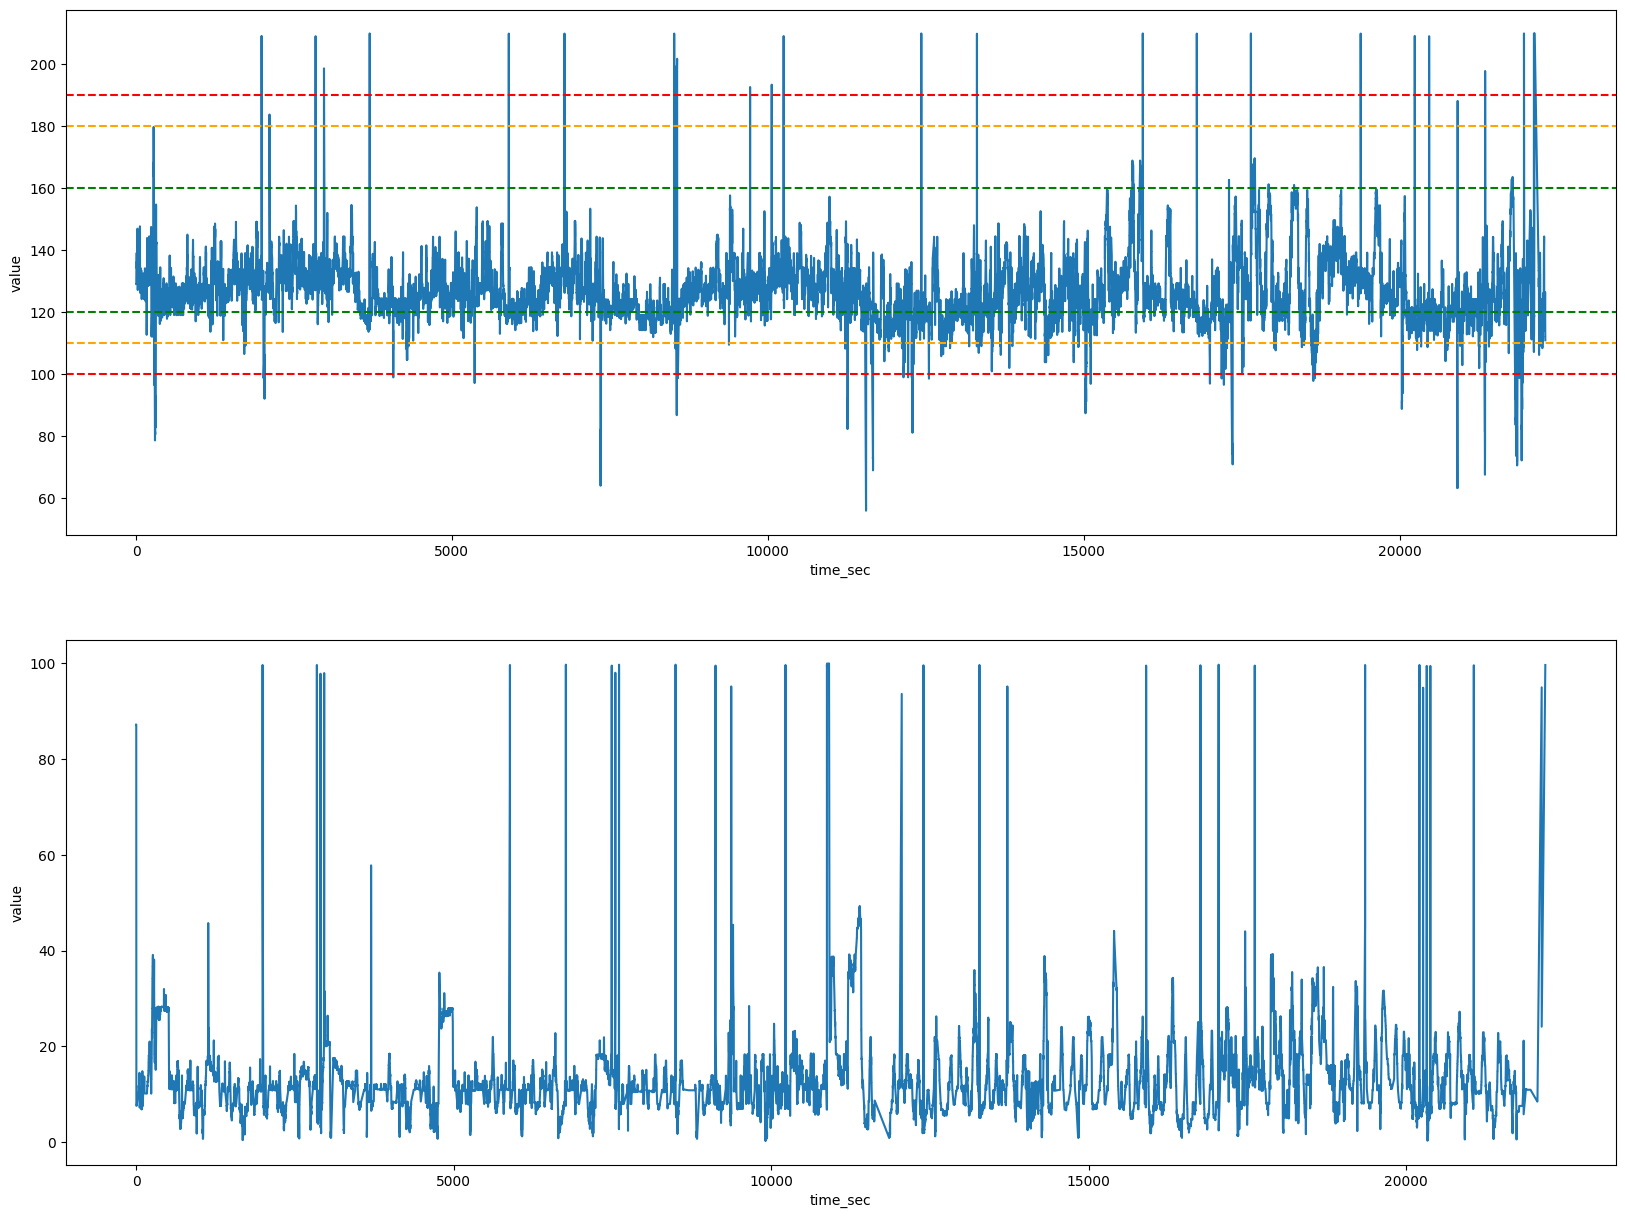

In [202]:
plt.subplots(2, 1, figsize = (20, 15))

plt.subplot(211)
sns.lineplot(bpm_df_5, x = 'time_sec', y = 'value')
plt.axhline(y = 160, color='green', linestyle='--', label = '160')
plt.axhline(y = 180, color='orange', linestyle='--', label = '180')
plt.axhline(y = 190, color='red', linestyle='--', label = '190')

plt.axhline(y = 120, color='green', linestyle='--', label = '120')
plt.axhline(y = 110, color='orange', linestyle='--', label = '110')
plt.axhline(y = 100, color='red', linestyle='--', label = '100')

plt.subplot(212)
sns.lineplot(uterus_df_5, x = 'time_sec', y = 'value')

plt.show()
plt.close()

In [341]:
# check hypoxia patient
bpm_df_1_h, uterus_df_5 = open_ctg('1', 'hypoxia')
bpm_df_1_h

,time_sec,value
0,0.000000,208.246927
1,0.127029,208.246927
2,0.254058,208.246927
3,0.381087,208.246927
4,0.508116,208.246927
...,...,...
3226,2832.110092,149.839658
3227,2832.237121,149.839658
3228,2832.364150,149.839658
3229,2832.491179,149.839658


In [342]:
bpm_df_1_h.describe()

,time_sec,value
count,12497.000000,12497.000000
mean,1280.229457,121.845271
std,835.585014,13.442674
min,0.000000,50.171032
25%,560.832745,115.889898
50%,1130.557516,121.063602
75%,2010.741002,126.579369
max,2832.618208,209.828968


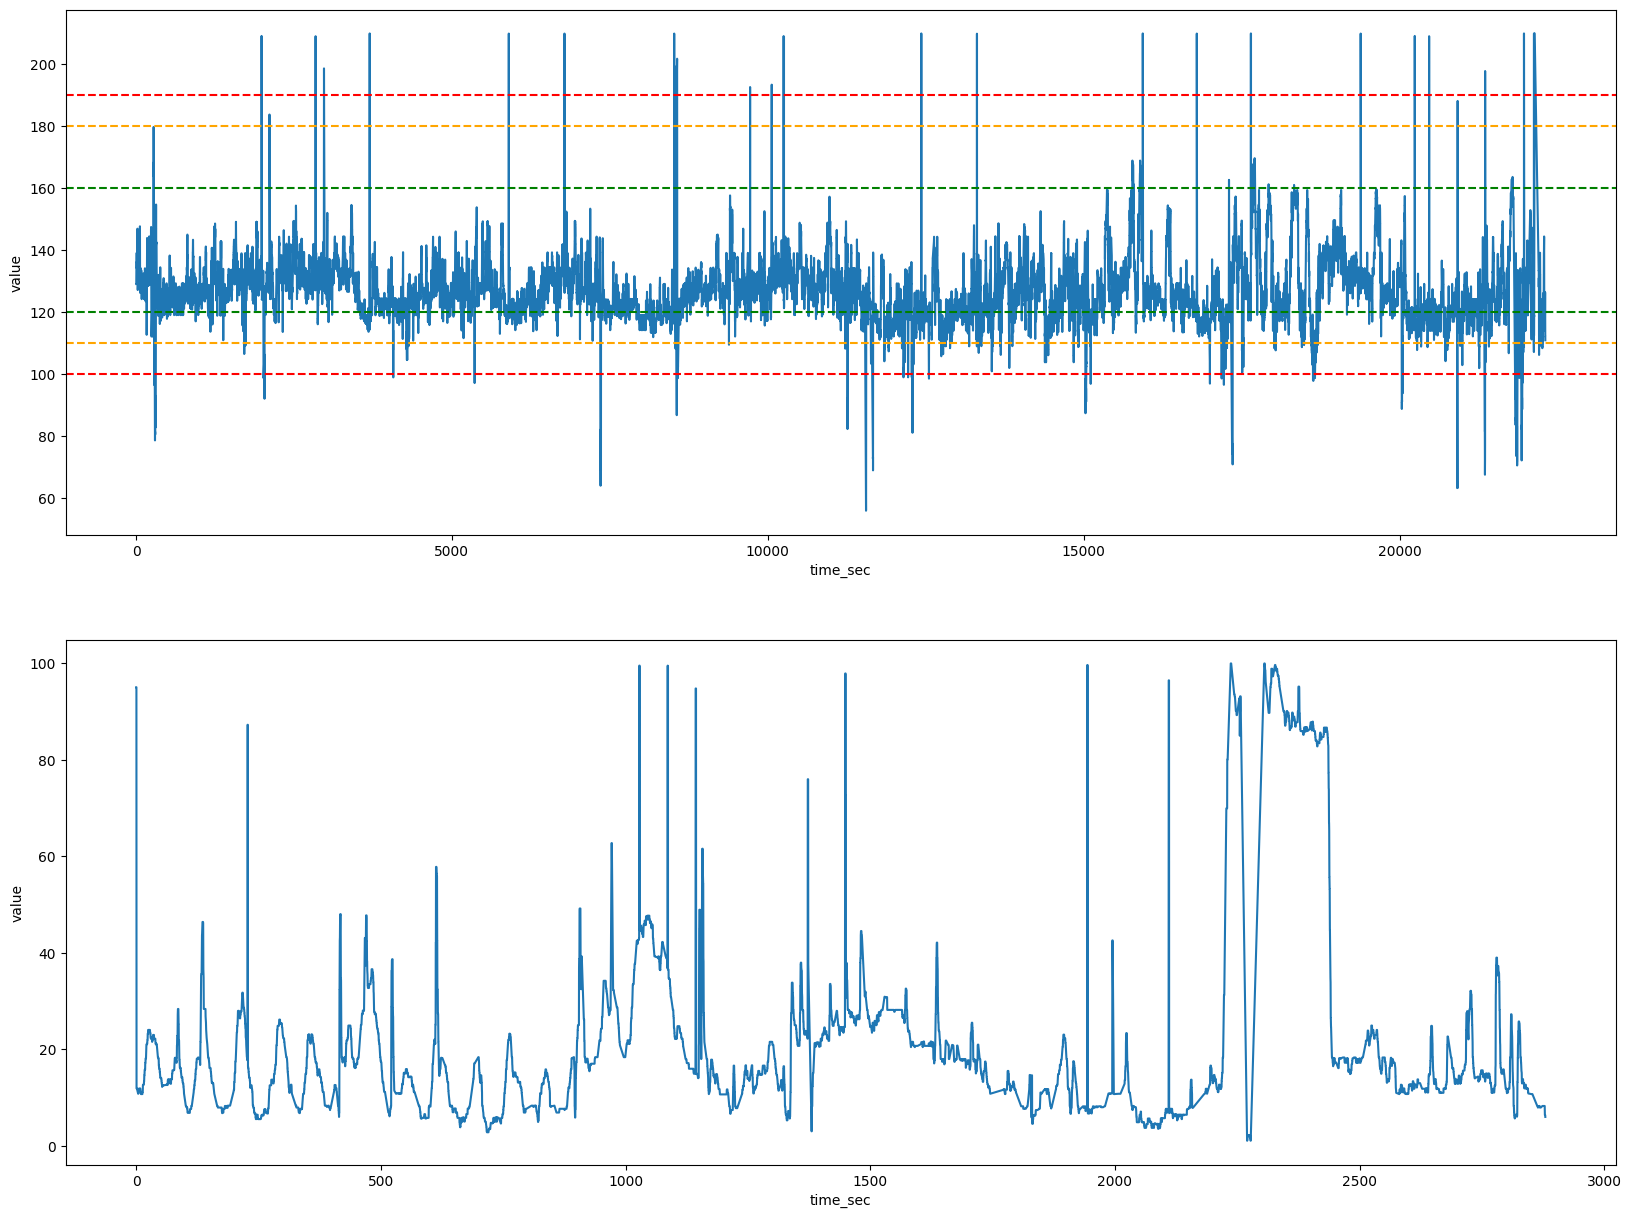

In [343]:
plt.subplots(2, 1, figsize = (20, 15))

plt.subplot(211)
sns.lineplot(bpm_df_5, x = 'time_sec', y = 'value')
plt.axhline(y = 160, color='green', linestyle='--', label = '160')
plt.axhline(y = 180, color='orange', linestyle='--', label = '180')
plt.axhline(y = 190, color='red', linestyle='--', label = '190')

plt.axhline(y = 120, color='green', linestyle='--', label = '120')
plt.axhline(y = 110, color='orange', linestyle='--', label = '110')
plt.axhline(y = 100, color='red', linestyle='--', label = '100')

plt.subplot(212)
sns.lineplot(uterus_df_5, x = 'time_sec', y = 'value')

plt.show()
plt.close()

##### Add CTG data to dataset

In [ ]:
hypoxia_path = os.path.join(project_path, 'data', 'hypoxia')
regular_path = os.path.join(project_path, 'data', 'regular')
hypoxia_list = os.listdir(hypoxia_path)
regular_list = os.listdir(regular_path)

In [196]:
len(hypoxia_list), len(regular_list)

(30, 98)

In [302]:
def open_bpm(bpm_path, bpm_list):
    # get dates of analysis    
    dates, dates_unique = check_dates(bpm_list)

    # concat data
    bpm_df = pd.read_csv(os.path.join(bpm_path, bpm_list[0]))

    for i in range(1, len(dates)):
        if dates[i] == dates_unique[0]:
            # bpm
            new_bpm_df = pd.read_csv(os.path.join(bpm_path, bpm_list[i]))
            new_bpm_df['time_sec'] = new_bpm_df['time_sec'] + bpm_df.iloc[-1, 0]
            bpm_df = pd.concat([bpm_df, new_bpm_df])

    return bpm_df

In [303]:
def add_bpm(dataset, regularity, folder_list):
    dataset['bpm_rythm'] = np.nan
    dataset['bpm_variability'] = np.nan
    dataset['bpm_min'] = np.nan
    dataset['bpm_25'] = np.nan
    dataset['bpm_50'] = np.nan
    dataset['bpm_75'] = np.nan
    dataset['bpm_max'] = np.nan
    dataset['bpm_total'] = np.nan
    dataset['bpm_160'] = np.nan
    dataset['bpm_180'] = np.nan
    dataset['bpm_120'] = np.nan
    dataset['bpm_100'] = np.nan

    for i in tqdm(range(len(dataset))):
        
        if str(dataset.iloc[i, 0]) in folder_list:

            bpm_path = os.path.join(project_path, 'data', regularity, str(dataset.iloc[i, 0]), 'bpm')
            bpm_list = os.listdir(bpm_path)

            if len(bpm_list) > 0:
                res = open_bpm(bpm_path, bpm_list)
                
                # add statistical data
                bpm_stat = res.describe()
                dataset.loc[i, 'bpm_rythm'] = bpm_stat.loc['mean', 'value']
                dataset.loc[i, 'bpm_variability'] = bpm_stat.loc['std', 'value']
                dataset.loc[i, 'bpm_min'] = bpm_stat.loc['min', 'value']
                dataset.loc[i, 'bpm_25'] = bpm_stat.loc['25%', 'value']
                dataset.loc[i, 'bpm_50'] = bpm_stat.loc['25%', 'value']
                dataset.loc[i, 'bpm_75'] = bpm_stat.loc['75%', 'value']
                dataset.loc[i, 'bpm_max'] = bpm_stat.loc['max', 'value']
                dataset.loc[i, 'bpm_total'] = bpm_stat.loc['count', 'value']

                # add bradicardy and tachicardy
                dataset.loc[i, 'bpm_160'] = len(res.loc[res['value'] > 160.0]) / bpm_stat.loc['count', 'value']
                dataset.loc[i, 'bpm_180'] = len(res.loc[res['value'] > 180.0]) / bpm_stat.loc['count', 'value']
                dataset.loc[i, 'bpm_120'] = len(res.loc[res['value'] < 120.0]) / bpm_stat.loc['count', 'value']
                dataset.loc[i, 'bpm_100'] = len(res.loc[res['value'] < 100.0]) / bpm_stat.loc['count', 'value']

    return dataset

In [305]:
regular = add_bpm(regular, 'regular', regular_list)
regular

100%|██████████| 104/104 [00:03<00:00, 28.77it/s]


,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,...,bpm_min,bpm_25,bpm_50,bpm_75,bpm_max,bpm_total,bpm_160,bpm_180,bpm_120,bpm_100
0,155,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.599251,124.270444,124.270444,139.021913,210.000000,20594.0,0.079295,0.024230,0.112023,0.009954
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.068947,135.939982,135.939982,179.132383,210.000000,13244.0,0.473497,0.238372,0.047342,0.027107
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.096817,148.086585,148.086585,164.462854,209.486905,27647.0,0.358122,0.054472,0.027200,0.005896
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.093533,134.489578,134.489578,141.758418,210.000000,26395.0,0.019814,0.009547,0.002614,0.001061
4,128,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.0,гипокапния,...,60.133618,122.004276,122.004276,138.209514,183.832175,20966.0,0.035438,0.001860,0.165935,0.000525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,141,II своевременные оперативные роды\nХолестаз бе...,7.364,38.1,5.4,1.6,-3.3,норма,0.0,норма,...,50.299305,127.434527,127.434527,138.979156,210.000000,20595.0,0.030881,0.027385,0.074290,0.001165
100,138,II своевременные оперативные роды \nРубец на м...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.197221,134.172239,134.172239,142.357028,210.000000,17219.0,0.029793,0.015448,0.016900,0.011441
101,127,I своевременные роды\nАстигматизм,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.171032,141.886692,141.886692,153.046499,210.000000,109084.0,0.100867,0.036018,0.011578,0.004409
102,118,I своевременные оперативные роды в 36 лет\nПер...,7.370,35.3,3.7,1.7,-4.5,норма,0.0,норма,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
hypoxia = add_bpm(hypoxia, 'hypoxia', hypoxia_list)
hypoxia

100%|██████████| 32/32 [00:02<00:00, 11.93it/s]


,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,...,bpm_min,bpm_25,bpm_50,bpm_75,bpm_max,bpm_total,bpm_160,bpm_180,bpm_120,bpm_100
0,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.275254,132.180652,132.180652,141.416355,207.220738,8146.0,0.016818,0.005156,0.007120,0.001105
1,12,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,I своевременные оперативные роды\nОстрая гипок...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.598610,133.634420,133.634420,156.552646,210.000000,125055.0,0.204102,0.043853,0.073864,0.017304
3,22,II своевременные роды.\nРубец на матке после о...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.171032,113.965794,113.965794,134.190273,210.000000,31783.0,0.071516,0.052040,0.426738,0.025926
4,16,I своевременные роды в 35 лет\nОстрая гипоксия...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.512623,188.407269,188.407269,194.307857,210.000000,142886.0,0.865417,0.815664,0.017643,0.007209
5,3,II своевременные оперативные роды.\nI период р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.213789,125.980759,125.980759,144.281133,210.000000,14934.0,0.068635,0.033414,0.177648,0.011116
6,10,I запоздалые оперативные роды на 42 неделе бер...,7.177,NaN,4.6,7.4,-8.3,ацидемия,-0.173,NaN,...,50.556447,123.303022,123.303022,138.113460,210.000000,139796.0,0.014321,0.004099,0.147057,0.025752
7,21,I своевременные оперативные роды крупным плодо...,7.3,NaN,4.2,1.2,-1.1,ацидемия,-0.050,NaN,...,50.642226,143.190578,143.190578,159.935760,210.000000,9628.0,0.249585,0.204092,0.128583,0.116327
8,7,I своевременные роды\nРаннее излитие околоплод...,7.053,42.5,3.9,6.7,-10.6,ацидемия,-0.297,норма,...,83.636851,134.607554,134.607554,193.511777,210.000000,23417.0,0.719178,0.646795,0.021566,0.000043
9,5,I своевременные оперативные роды\nII период ро...,7.055,NaN,7.1,6.7,-14.0,ацидемия,-0.295,NaN,...,50.812400,127.946524,127.946524,143.041154,210.000000,63021.0,0.130782,0.116057,0.068707,0.039796


##### Train model

In [307]:
regular['target'] = 0
hypoxia['target'] = 1

full_dataset = pd.concat([regular, hypoxia]).reset_index(drop = True)
full_dataset

,folder,diagnosis,gases_ph,gases_co2,glucosa,lactat,be,ph_res,ph_dif,co2_res,...,bpm_25,bpm_50,bpm_75,bpm_max,bpm_total,bpm_160,bpm_180,bpm_120,bpm_100,target
0,155,I своевременные оперативные роды в чисто ягоди...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.270444,124.270444,139.021913,210.000000,20594.0,0.079295,0.024230,0.112023,0.009954,0
1,150,II своевременные оперативные роды\nРубец на ма...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135.939982,135.939982,179.132383,210.000000,13244.0,0.473497,0.238372,0.047342,0.027107,0
2,139,V своевременные роды крупным плодом\nРаннее из...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,148.086585,148.086585,164.462854,209.486905,27647.0,0.358122,0.054472,0.027200,0.005896,0
3,134,I своевременные оперативные роды в 33 года на ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.489578,134.489578,141.758418,210.000000,26395.0,0.019814,0.009547,0.002614,0.001061,0
4,128,"II своевременные роды\nГСД, Инсулинотерапия",7.397,26.9,5.4,4.1,-7.7,норма,0.000,гипокапния,...,122.004276,122.004276,138.209514,183.832175,20966.0,0.035438,0.001860,0.165935,0.000525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,27,II своевременные оперативные роды в 32 года.\n...,7.316,NaN,4.1,2.5,-5.1,ацидемия,-0.034,NaN,...,123.800107,123.800107,136.657747,210.000000,7847.0,0.097617,0.095450,0.074296,0.000000,1
132,32,I своевременные роды в 30 лет\nПреэклампсия ум...,7.152,52,5.7,7.5,-9.9,ацидемия,-0.198,гиперкапния,...,138.979156,138.979156,152.362373,210.000000,154408.0,0.045496,0.003031,0.049563,0.016463,1
133,25,I своевременные оперативные роды\nII период ро...,7.076,14.7,6.6,19.0,-24.3,ацидемия,-0.274,гипокапния,...,143.554249,143.554249,157.493319,210.000000,124393.0,0.143023,0.018080,0.018715,0.004389,1
134,26,I своевременные оперативные роды\nII период ро...,7.076,14.7,6.6,19.0,-24.3,ацидемия,-0.274,гипокапния,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [309]:
# random_seed
seed_num = 13 
np.random.seed(seed_num)

In [311]:
features = ['gases_ph', 'gases_co2', 'glucosa', 'lactat', 'be', 'resume', 'bpm_rythm',
            'bpm_variability', 'bpm_min', 'bpm_25', 'bpm_50', 'bpm_75', 'bpm_max',
            'bpm_total', 'bpm_160', 'bpm_180', 'bpm_120', 'bpm_100']

cat_features = ['resume']
full_dataset[cat_features] = full_dataset[cat_features].astype('str')

X_train, X_val, y_train, y_val = train_test_split(full_dataset[features], full_dataset['target'], test_size = 0.1, random_state = seed_num)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((122, 18), (14, 18), (122,), (14,))

In [313]:
model = CatBoostClassifier(
    iterations = 1000,        
    eval_metric = 'F1',
    random_seed = seed_num,   
    verbose = 100,
    cat_features = cat_features)

model.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True)   
y_val_pred = model.predict(X_val)

f1_score(y_val, y_val_pred, average = 'macro')

Learning rate set to 0.018847
0:	learn: 0.8372093	test: 0.2222222	best: 0.2222222 (0)	total: 168ms	remaining: 2m 47s
100:	learn: 0.8888889	test: 0.2500000	best: 0.2500000 (2)	total: 3.23s	remaining: 28.7s
200:	learn: 0.9361702	test: 0.4444444	best: 0.4444444 (175)	total: 6.36s	remaining: 25.3s
300:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (271)	total: 9.61s	remaining: 22.3s
400:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (271)	total: 12.7s	remaining: 19s
500:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (271)	total: 15.9s	remaining: 15.9s
600:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (271)	total: 19s	remaining: 12.6s
700:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (271)	total: 22.2s	remaining: 9.47s
800:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (271)	total: 25.3s	remaining: 6.29s
900:	learn: 1.0000000	test: 0.4444444	best: 0.6000000 (271)	total: 28.5s	remaining: 3.13s
999:	learn: 1.0000000	test: 0.4444444	best: 0.6000000 (271)	total: 31.6s	remain

0.6888888888888889

In [315]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,lactat,28.484408
1,bpm_100,10.826776
2,resume,9.970074
3,bpm_variability,5.292532
4,bpm_120,5.019705
5,bpm_160,4.683634
6,bpm_total,4.505595
7,be,3.674297
8,bpm_max,3.563803
9,bpm_180,3.229377


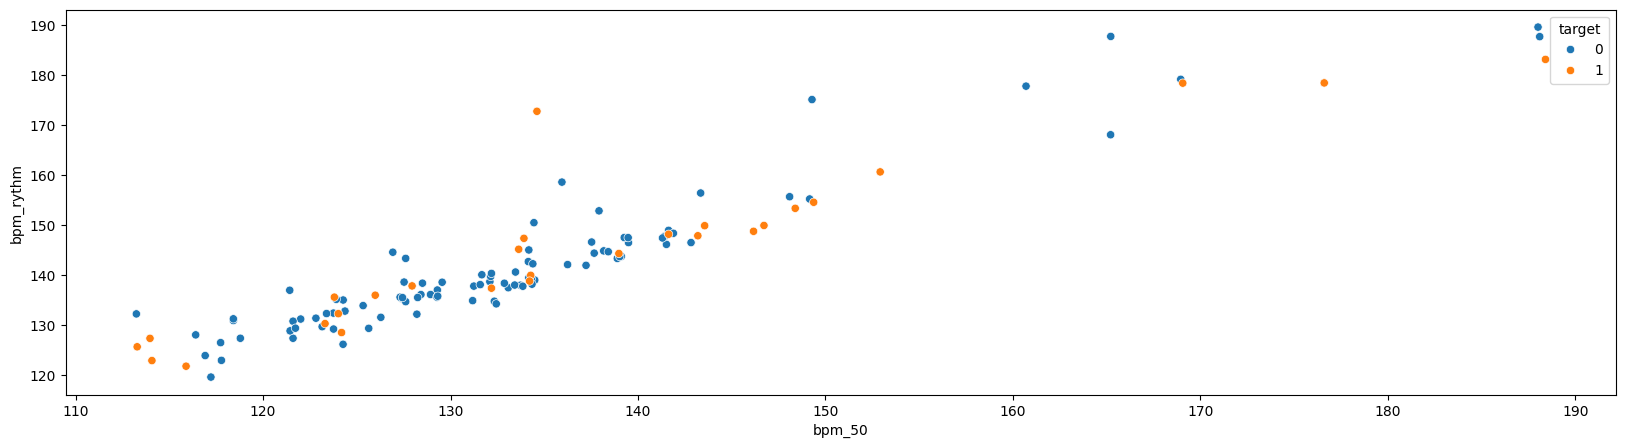

In [316]:
plt.figure(figsize = (20, 5))

sns.scatterplot(full_dataset, x = 'bpm_50', y = 'bpm_rythm', hue = 'target')

plt.show()
plt.close()

In [323]:
full_dataset[['gases_ph', 'gases_co2', 'glucosa', 'lactat', 'be']] = full_dataset[['gases_ph', 'gases_co2', 'glucosa', 'lactat', 'be']].astype('float64')

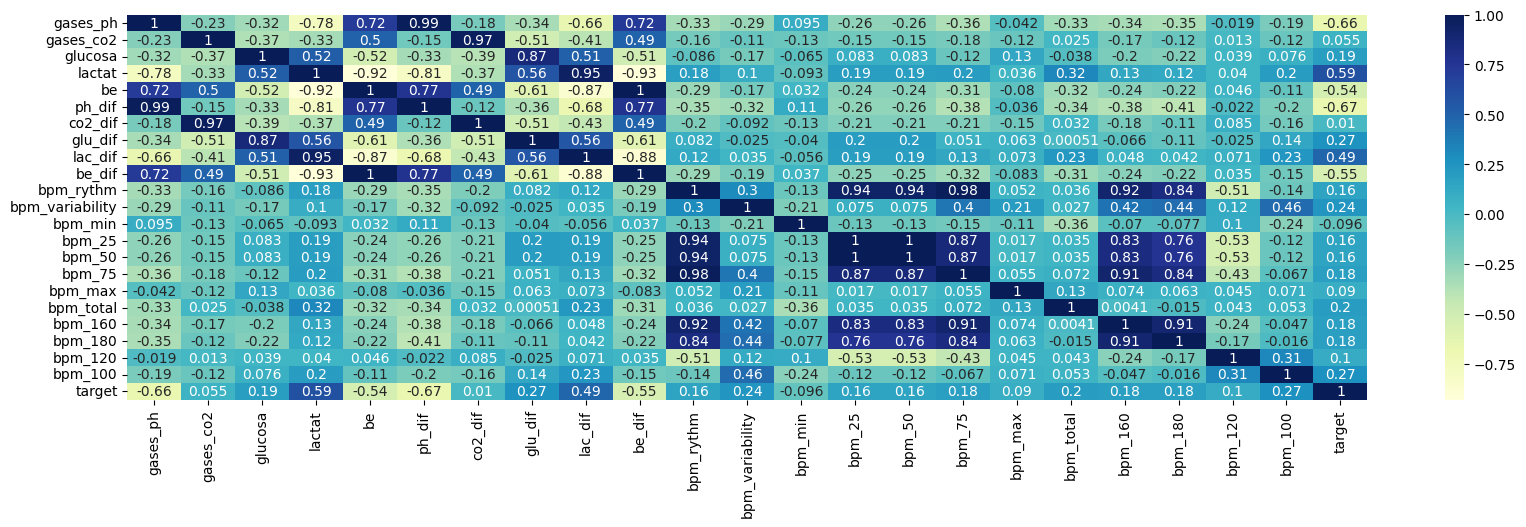

In [324]:
co_mtx = full_dataset.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize = (20, 5))

sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

plt.show()
plt.close()

In [327]:
# try only highly correlated features (> 0.20 or < -0.20)
features = ['gases_ph', 'lactat', 'be', 'ph_dif', 'glu_dif', 'lac_dif', 'be_dif', 'bpm_variability', 'bpm_100']

X_train, X_val, y_train, y_val = train_test_split(full_dataset[features], full_dataset['target'], test_size = 0.1, random_state = seed_num)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

model = CatBoostClassifier(
    iterations = 1000,        
    eval_metric = 'F1',
    random_seed = seed_num,   
    verbose = 100)

model.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True)   
y_val_pred = model.predict(X_val)

f1_score(y_val, y_val_pred, average = 'macro')

Learning rate set to 0.018847
0:	learn: 0.8095238	test: 0.2500000	best: 0.2500000 (0)	total: 1.68ms	remaining: 1.68s
100:	learn: 0.8636364	test: 0.2500000	best: 0.2500000 (0)	total: 134ms	remaining: 1.19s
200:	learn: 0.9130435	test: 0.2500000	best: 0.2500000 (0)	total: 271ms	remaining: 1.08s
300:	learn: 0.9583333	test: 0.4444444	best: 0.4444444 (270)	total: 404ms	remaining: 939ms
400:	learn: 0.9583333	test: 0.4444444	best: 0.4444444 (270)	total: 544ms	remaining: 812ms
500:	learn: 0.9795918	test: 0.4444444	best: 0.4444444 (270)	total: 686ms	remaining: 683ms
600:	learn: 0.9795918	test: 0.4444444	best: 0.4444444 (270)	total: 827ms	remaining: 549ms
700:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (695)	total: 967ms	remaining: 413ms
800:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (695)	total: 1.11s	remaining: 275ms
900:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (695)	total: 1.25s	remaining: 137ms
999:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (695)	total: 1.38s	rema

0.6888888888888889

In [328]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,bpm_variability,25.820315
1,bpm_100,25.125030
2,lactat,21.691042
3,ph_dif,5.665928
4,be,5.535895
5,be_dif,5.248680
6,gases_ph,4.111479
7,glu_dif,3.541770
8,lac_dif,3.259860


In [ ]:
# try highly correlated features (> 0.15 or < -0.15)
features = ['gases_ph', 'glucosa', 'lactat', 'be', 'ph_dif', 'glu_dif', 'lac_dif', 'be_dif', 
            'bpm_rythm', 'bpm_variability', 'bpm_25', 'bpm_50', 'bpm_75', 'bpm_160', 'bpm_180', 'bpm_100']

X_train, X_val, y_train, y_val = train_test_split(full_dataset[features], full_dataset['target'], test_size = 0.1, random_state = seed_num)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

model = CatBoostClassifier(
    iterations = 1000,        
    eval_metric = 'F1',
    random_seed = seed_num,   
    verbose = 100)

model.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True)   
y_val_pred = model.predict(X_val)

f1_score(y_val, y_val_pred, average = 'macro')

Learning rate set to 0.018847
0:	learn: 0.7179487	test: 0.0000000	best: 0.0000000 (0)	total: 1.84ms	remaining: 1.84s
100:	learn: 0.8888889	test: 0.2500000	best: 0.2500000 (4)	total: 152ms	remaining: 1.35s
200:	learn: 0.9583333	test: 0.6000000	best: 0.6000000 (165)	total: 319ms	remaining: 1.27s
300:	learn: 0.9583333	test: 0.6000000	best: 0.6000000 (165)	total: 495ms	remaining: 1.15s
400:	learn: 0.9795918	test: 0.6000000	best: 0.6000000 (165)	total: 669ms	remaining: 999ms
500:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 863ms	remaining: 860ms
600:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 1.1s	remaining: 734ms
700:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 1.27s	remaining: 544ms
800:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 1.44s	remaining: 359ms
900:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 1.61s	remaining: 177ms
999:	learn: 0.9795918	test: 0.4444444	best: 0.6000000 (165)	total: 1.78s	rem

0.6888888888888889

It's impossible to create a full model on such a small amount of data

##### Save

In [ ]:
# datasets
regular.to_csv('regular_added.csv', index=False)
hypoxia.to_csv('hypoxia_added.csv', index=False)

In [346]:
# Сохранение в собственном формате CatBoost
model.save_model("hypoxia_model.cbm")

# Сохранение в JSON формате
model.save_model("hypoxia_model.json", format='json')

# Сохранение в формате ONNX
model.save_model("hypoxia_model.onnx", format='onnx')